Accuracy: 0.8241758241758241
Precision: 0.7924528301886793
Recall: 0.8936170212765957
F1 score: 0.8400000000000001
Feature ranking:
1. thal_2 (0.122617)
2. oldpeak (0.090881)
3. thalach (0.085497)
4. cp_0 (0.083797)
5. ca_0 (0.080127)


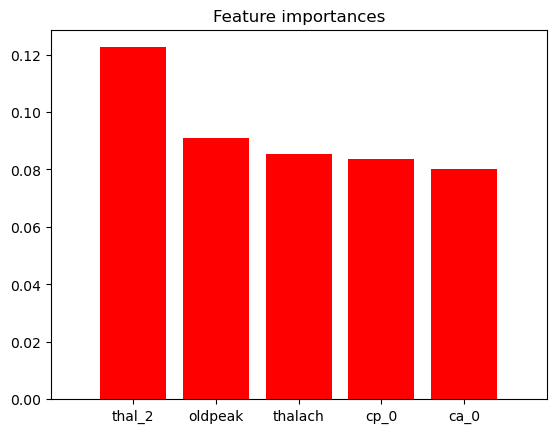

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Accuracy: 0.8241758241758241
Precision: 0.8297872340425532
Recall: 0.8297872340425532
F1 score: 0.8297872340425532


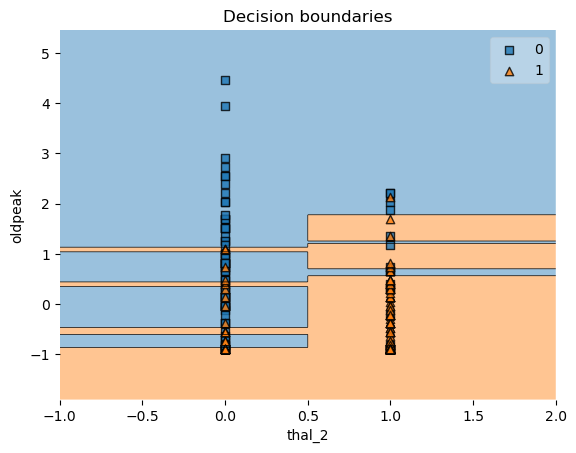

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Q1. Preprocess the dataset
data = pd.read_csv('dataset.csv')
data = data.dropna() # drop rows with missing values

# encode categorical variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# scale numerical features
scaler = StandardScaler()
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Q2. Split the dataset into a training set and a test set
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Q3. Train a random forest classifier on the training set
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)

# Q4. Evaluate the performance of the model on the test set
y_pred = rfc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

# Q5. Identify the top 5 most important features in predicting heart disease risk
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(5):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(5), importances[indices[:5]], color="r", align="center")
plt.xticks(range(5), features[indices[:5]])
plt.xlim([-1, 5])
plt.show()

# Q6. Tune the hyperparameters of the random forest classifier using grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics
best_params = grid_search.best_params_
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)
y_pred = best_rfc.predict(X_test)
print('Best hyperparameters:', best_params)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier
from mlxtend.plotting import plot_decision_regions

X_2d = X_train.iloc[:, indices[:2]].values # select two most important features
y_2d = y_train.values

best_rfc.fit(X_2d,y_2d)

plot_decision_regions(X_2d,y_2d,best_rfc)
plt.xlabel(features[indices[0]])
plt.ylabel(features[indices[1]])
plt.title('Decision boundaries')
plt.show()
